In [17]:
#Basic statistic and Info/Introduction of dataset

In [18]:
import pandas as pd

# Loading the dataset
file_path = r'C:\Users\win11\Desktop\MASTER\Machine Learning\Projekat/Reviews.csv'
df = pd.read_csv(file_path)

# Displaying basic information about the DataFrame
print(df.info())

# Displaying the first 1000 rows for initial exploration
print(df.head(1000))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
       Id   ProductId          UserId                      ProfileName  \
0       1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1       2  B00813GRG4  A1D87F6ZCVE5NK            

In [20]:
import pandas as pd

# Displaying data types of each column
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [21]:
# Check for missing values
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [22]:
import pandas as pd


# Fill missing values with 0 in 'ProfileName' and 'Summary' columns
df['ProfileName'].fillna(0, inplace=True)
df['Summary'].fillna(0, inplace=True)

In [23]:
#Again checking 
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [24]:
# Checking for duplicate rows
duplicate_rows = df.duplicated()

# Displaying the duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print(df[duplicate_rows])

Number of duplicate rows: 0
Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text]
Index: []


In [25]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Removing HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Removing non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    return text

# Applying text cleaning to the 'Text' column
df['Text'] = df['Text'].apply(lambda x: clean_text(str(x)))

C:\Users\win11\AppData\Local\Temp\ipykernel_15312\2487656658.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [26]:
print(df['Text'].head(1000))

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price   There was a wid...
                             ...                        
995    BLACK MARKET HOT SAUCE IS WONDERFUL     My hus...
996    Man what can i say  this salsa is the bomb   i...
997    this sauce is so good with just about anything...
998    Not hot at all  Like the other low star review...
999    I have to admit  I was a sucker for the large ...
Name: Text, Length: 1000, dtype: object


In [27]:
# Displaying the total number of reviews
total_reviews = len(df)
print(f"Total number of reviews: {total_reviews}")

# Displaying the total number of words in the 'Text' column
total_words = df['Text'].apply(lambda x: len(x.split())).sum()
print(f"Total number of words: {total_words}")

Total number of reviews: 568454
Total number of words: 46457953


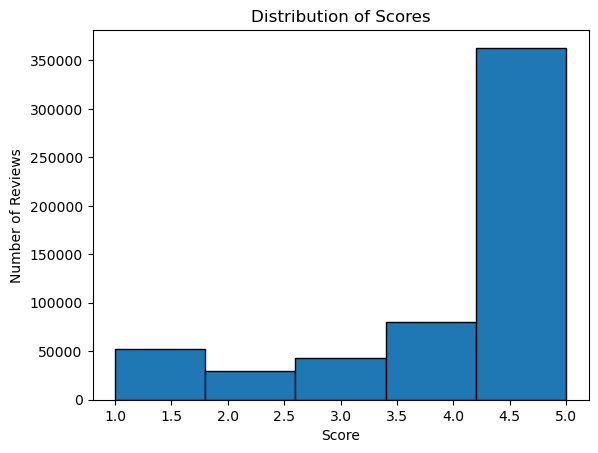

In [28]:
#This code uses matplotlib to create a histogram displaying the distribution of scores in the 
#DataFrame column 'Score'.
#The x-axis represents scores, and the y-axis shows the number of reviews for each score.

import matplotlib.pyplot as plt

plt.hist(df['Score'], bins=5, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')
plt.show()

In [29]:
# First ML Case :  Score - Text prediction

In [30]:
#Spliting dataset 20-80 target : Score and Text

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) TF-IDF for converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


In [32]:
print(f"Trening set: {X_train.shape[0]} rewievs")
print(f"Test set: {X_test.shape[0]} rewievs")
print(f"Total: {X_train.shape[0] + X_test.shape[0]} rewievs")

Trening set: 16000 rewievs
Test set: 4000 rewievs
Total: 20000 rewievs


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

# 2) Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) TF-IDF for converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


In [34]:
#kNN Clasifier Alghoritm on Text and Score

In [35]:
#Accuracy - but only on 20000 rows
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_predicted_kn): .2f}")

Accuracy :  0.64


In [36]:
#Precision - but only on 20000 rows
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)#Kako sam povecavao n_neighbors , smanjivao sam precission ??
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Precision: {precision_score(y_test, y_predicted_kn, average='weighted'):.2%}")

Precision: 57.02%


In [37]:
#Recall
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)#Kako sam povecavao n_neighbors, iznad 10 se sve vrti oko cca 65%
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Recall: {recall_score(y_test, y_predicted_kn, average='weighted'):.2%}")

Recall: 64.08%


In [38]:
#F1-Score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)#Kako sam povecavao n_neighbors,smanjivao mi se F1-Score
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

print(f"F1-Score: {f1_score(y_test, y_predicted_kn, average='weighted'):.2%}")

F1-Score: 57.93%


In [39]:
#Results per scores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)#Kako sam povecavao n_neighbors,smanjivao mi se F1-Score
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

precision_per_class = precision_score(y_test, y_predicted_kn, average=None)
recall_per_class = recall_score(y_test, y_predicted_kn, average=None)

for i in range(len(precision_per_class)):
    p = precision_per_class[i]
    r = recall_per_class[i]
    f1 = 2 * (p * r) / (p + r) if p + r > 0 else 0

    print(f"Score {i+1}:")
    print(f"  Precision: {p:.2%}")
    print(f"  Recall:    {r:.2%}")
    print(f"  F1:        {f1:.2%}\n")

Score 1:
  Precision: 54.60%
  Recall:    26.03%
  F1:        35.25%

Score 2:
  Precision: 35.85%
  Recall:    8.48%
  F1:        13.72%

Score 3:
  Precision: 25.33%
  Recall:    11.52%
  F1:        15.83%

Score 4:
  Precision: 30.57%
  Recall:    14.29%
  F1:        19.47%

Score 5:
  Precision: 69.39%
  Recall:    92.68%
  F1:        79.36%



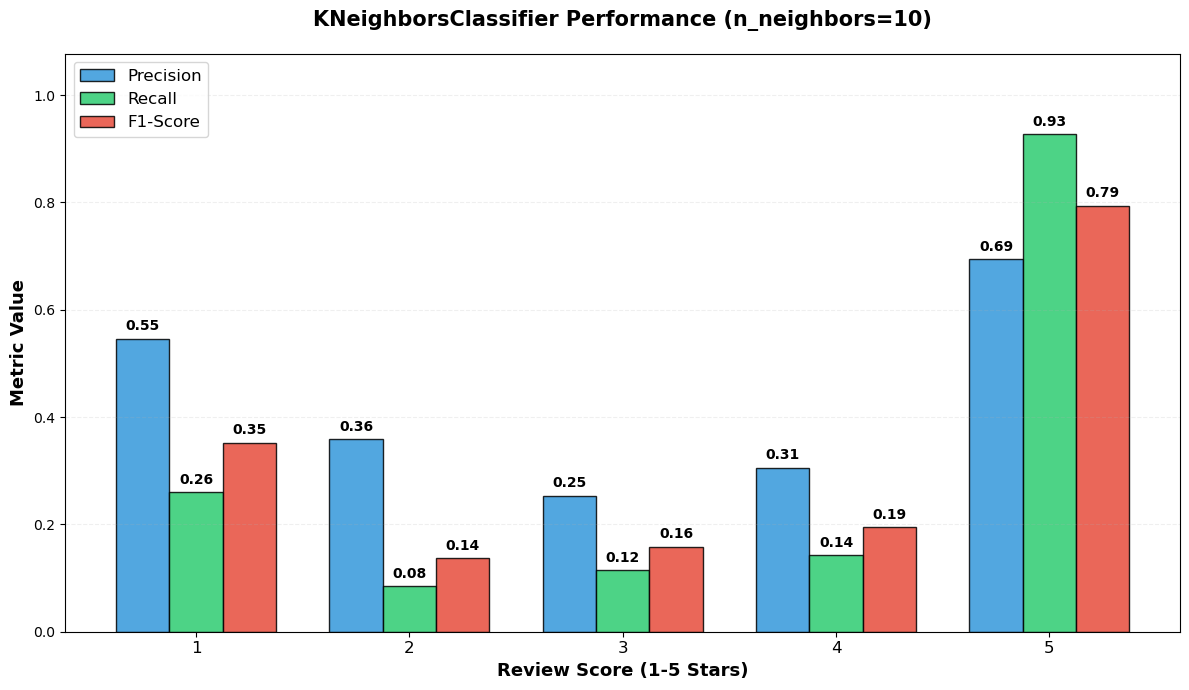

Average Precision: 43.15%
Average Recall:    30.60%
Average F1-Score:  32.73%
Overall Accuracy:  64.08%


In [40]:
# Visualizing above calculated statistic 
import matplotlib.pyplot as plt
import numpy as np

# F1 for all classes :
f1_per_class = []
for i in range(len(precision_per_class)):
    p = precision_per_class[i]
    r = recall_per_class[i]
    f1 = 2 * (p * r) / (p + r) if p + r > 0 else 0
    f1_per_class.append(f1)

plt.figure(figsize=(12, 7))

x = np.arange(len(precision_per_class))
width = 0.25

#Setting Bars
bars1 = plt.bar(x - width, precision_per_class, width, 
                label='Precision', color='#3498db', alpha=0.85, edgecolor='black')
bars2 = plt.bar(x, recall_per_class, width, 
                label='Recall', color='#2ecc71', alpha=0.85, edgecolor='black')
bars3 = plt.bar(x + width, f1_per_class, width, 
                label='F1-Score', color='#e74c3c', alpha=0.85, edgecolor='black')

# Setting labels 
plt.xlabel('Review Score (1-5 Stars)', fontsize=13, fontweight='bold')
plt.ylabel('Metric Value', fontsize=13, fontweight='bold')
plt.title(f'KNeighborsClassifier Performance (n_neighbors={knn.n_neighbors})', 
          fontsize=15, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'], 
           fontsize=12)

#Adding values inside bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')
plt.ylim(0, max(max(precision_per_class), max(recall_per_class), max(f1_per_class)) + 0.15)
plt.tight_layout()

plt.show()

# Calculated average statistic for whole results :
print(f"Average Precision: {np.mean(precision_per_class):.2%}")
print(f"Average Recall:    {np.mean(recall_per_class):.2%}")
print(f"Average F1-Score:  {np.mean(f1_per_class):.2%}")
print(f"Overall Accuracy:  {accuracy_score(y_test, y_predicted_kn):.2%}")

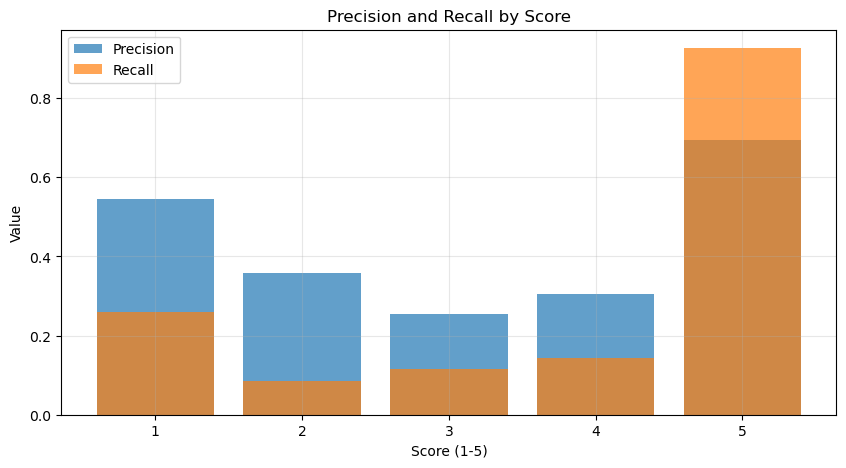

In [41]:
#Visualization of whole kNN(Text-Score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)#Kako sam povecavao n_neighbors,smanjivao mi se F1-Score
knn.fit(X_train,y_train)
y_predicted_kn = knn.predict(X_test)

precision_per_class = precision_score(y_test, y_predicted_kn, average=None)
recall_per_class = recall_score(y_test, y_predicted_kn, average=None)

plt.figure(figsize=(10, 5))
plt.bar(range(len(precision_per_class)), precision_per_class, alpha=0.7, label='Precision')
plt.bar(range(len(recall_per_class)), recall_per_class, alpha=0.7, label='Recall')
plt.xlabel('Score (1-5)')
plt.ylabel('Value')
plt.title('Precision and Recall by Score')
plt.xticks(range(len(precision_per_class)), ['1', '2', '3', '4', '5'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
#Logistic/Sofmax Regression Alghoritm on Text and Score

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#TF-IDF converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [44]:
#Accuracy - but only on 20000 rows

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # Logistic
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predicted_LR))

Accuracy: 0.7085


In [45]:
#Precision 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # Logistic Regression Multinominal 
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

print(f"Precision: {precision_score(y_test, y_predicted_LR, average='weighted'):.2%}")

Precision: 66.07%


In [46]:
#Recall result for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # Logistic Regression Multinominal 
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

print("Recall:", recall_score(y_test, y_predicted_LR, average='weighted'))

Recall: 0.7085


In [47]:
#F1-Score result for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # Logistic Regression Multinominal 
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

#print("F1:", f1_score(y_test, y_pred, average='weighted'))
print(f"F1-Score: {f1_score(y_test, y_predicted_LR, average='weighted'):.2%}")

F1-Score: 66.33%


In [48]:
''' Pitanje/Zaključak za profesoricu : Manje-više dobijam iste rezultate precission,reccal,F1-Score , ali ima bitna razlika :
Koristeći kNN Classifier algoritam dobijam ovo : 
Score 1:
  Precision: 54.60%
  Recall:    26.03%
  F1:        35.25%

Score 2:
  Precision: 35.85%
  Recall:    8.48%
  F1:        13.72%

Score 3:
  Precision: 25.33%
  Recall:    11.52%
  F1:        15.83%

Score 4:
  Precision: 30.57%
  Recall:    14.29%
  F1:        19.47%

Score 5:
  Precision: 69.39%
  Recall:    92.68%
  F1:        79.36%
a koristeći Logistic Regression algoritmom dobijam ovo :  
Score 1:
  Precision: 69.20%
  Recall:    52.33%
  F1:        59.59%
Score 2:
  Precision: 48.65%
  Recall:    16.07%
  F1:        24.16%
Score 3:
  Precision: 41.11%
  Recall:    22.42%
  F1:        29.02%
Score 4:
  Precision: 43.59%
  Recall:    20.99%
  F1:        28.33%
Score 5:
  Precision: 75.51%
  Recall:    96.02%
  F1:        84.54%

I ja sam došao do zaključka ( ispravnog ili ne ) da je u ovom slucaju LR bolji algoritam za Text-Score analizu '''

' Pitanje/Zaključak za profesoricu : Manje-više dobijam iste rezultate precission,reccal,F1-Score , ali ima bitna razlika :\nKoristeći kNN Classifier algoritam dobijam ovo : \nScore 1:\n  Precision: 54.60%\n  Recall:    26.03%\n  F1:        35.25%\n\nScore 2:\n  Precision: 35.85%\n  Recall:    8.48%\n  F1:        13.72%\n\nScore 3:\n  Precision: 25.33%\n  Recall:    11.52%\n  F1:        15.83%\n\nScore 4:\n  Precision: 30.57%\n  Recall:    14.29%\n  F1:        19.47%\n\nScore 5:\n  Precision: 69.39%\n  Recall:    92.68%\n  F1:        79.36%\na koristeći Logistic Regression algoritmom dobijam ovo :  \nScore 1:\n  Precision: 69.20%\n  Recall:    52.33%\n  F1:        59.59%\nScore 2:\n  Precision: 48.65%\n  Recall:    16.07%\n  F1:        24.16%\nScore 3:\n  Precision: 41.11%\n  Recall:    22.42%\n  F1:        29.02%\nScore 4:\n  Precision: 43.59%\n  Recall:    20.99%\n  F1:        28.33%\nScore 5:\n  Precision: 75.51%\n  Recall:    96.02%\n  F1:        84.54%\n\nI ja sam došao do zaključ

In [49]:
#Results per scores with Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # SOFTMAX
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

precision_k = precision_score(y_test, y_predicted_LR, average=None)
recall_k = recall_score(y_test, y_predicted_LR, average=None)

for i in range(5):
    p, r = precision_k[i], recall_k[i]
    f1 = 2*p*r/(p+r) if p+r > 0 else 0
    print(f"Score {i+1}:")
    print(f"  Precision: {p:.2%}")
    print(f"  Recall:    {r:.2%}")
    print(f"  F1:        {f1:.2%}")

Score 1:
  Precision: 69.20%
  Recall:    52.33%
  F1:        59.59%
Score 2:
  Precision: 48.65%
  Recall:    16.07%
  F1:        24.16%
Score 3:
  Precision: 41.11%
  Recall:    22.42%
  F1:        29.02%
Score 4:
  Precision: 43.59%
  Recall:    20.99%
  F1:        28.33%
Score 5:
  Precision: 75.51%
  Recall:    96.02%
  F1:        84.54%


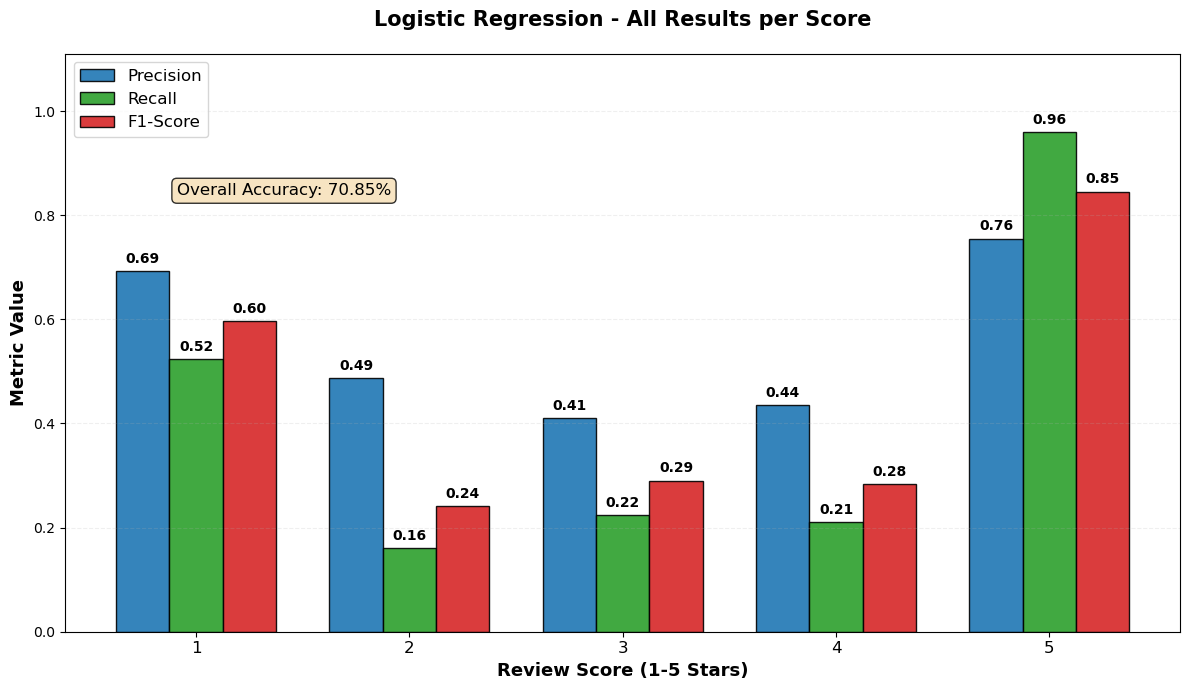

In [50]:
#Graph Logistic Regression Results Visualization

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42  
)
logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

#All metrics in logistic Regression
precision_k = precision_score(y_test, y_predicted_LR, average=None)
recall_k = recall_score(y_test, y_predicted_LR, average=None)
f1_k = f1_score(y_test, y_predicted_LR, average=None)

#Graph : Logistic Regression Results
plt.figure(figsize=(12, 7))

x = np.arange(len(precision_k))
width = 0.25

# Bars for every metric
bars_precision = plt.bar(x - width, precision_k, width, 
                         label='Precision', color='#1f77b4', alpha=0.9, edgecolor='black')
bars_recall = plt.bar(x, recall_k, width, 
                      label='Recall', color='#2ca02c', alpha=0.9, edgecolor='black')
bars_f1 = plt.bar(x + width, f1_k, width, 
                  label='F1-Score', color='#d62728', alpha=0.9, edgecolor='black')

plt.xlabel('Review Score (1-5 Stars)', fontsize=13, fontweight='bold')
plt.ylabel('Metric Value', fontsize=13, fontweight='bold')
plt.title('Logistic Regression - All Results per Score', 
          fontsize=15, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'], 
           fontsize=12)

for bars in [bars_precision, bars_recall, bars_f1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')
plt.ylim(0, max(max(precision_k), max(recall_k), max(f1_k)) + 0.15)

# Accuracy 
accuracy = accuracy_score(y_test, y_predicted_LR)
plt.text(0.1, 0.75, f'Overall Accuracy: {accuracy:.2%}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

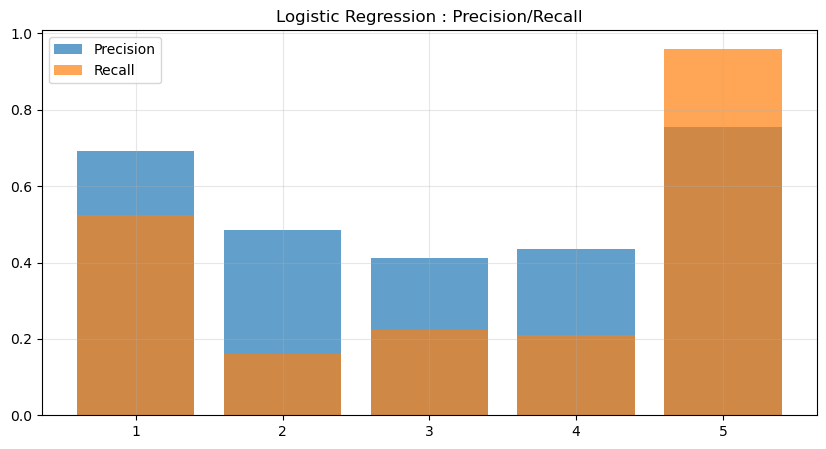

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


logreg = LogisticRegression(
    max_iter=200,
    multi_class='multinomial',   # SOFTMAX
    solver='lbfgs'
)

logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

plt.figure(figsize=(10,5))
plt.bar(range(5), precision_k, alpha=0.7, label='Precision')
plt.bar(range(5), recall_k, alpha=0.7, label='Recall')
plt.title("Logistic Regression : Precision/Recall")
plt.xticks(range(5), ['1','2','3','4','5'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [61]:
#LINEAR REGRESSION On Text-Score Columns

In [62]:
#TEXT-SCORE COLUMNS : 
# First 20000 rows
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

# 2) Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) TF-IDF for converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [63]:
#Accuracy With Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 1, 5)   # Pretvaramo u klase


print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.4735


In [64]:
#Percission With Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 1, 5)   

print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))

Precision: 0.640720889894783


In [65]:
#Recall With Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 1, 5)   

print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))

Recall: 0.4735


In [66]:
#F1-Score using Linear Rregression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 1, 5)   # Pretvaramo u klase

print("F1:", f1_score(y_test, y_pred_lr, average='weighted'))

F1: 0.5185011848788696


In [67]:
#Results per scores with Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 1, 5)   # Pretvaramo u klase
precision_k = precision_score(y_test, y_pred_lr, average=None)
recall_k = recall_score(y_test, y_predicted, average=None)

for i in range(5):
    p, r = precision_k[i], recall_k[i]
    f1 = 2*p*r/(p+r) if p+r > 0 else 0
    print(f"Score : {i+1}:")
    print(f"  Precision: {p:.2%}")
    print(f"  Recall:    {r:.2%}")
    print(f"  F1:        {f1:.2%}")

Score : 1:
  Precision: 72.63%
  Recall:    39.45%
  F1:        51.13%
Score : 2:
  Precision: 20.69%
  Recall:    4.46%
  F1:        7.34%
Score : 3:
  Precision: 19.01%
  Recall:    13.64%
  F1:        15.88%
Score : 4:
  Precision: 17.34%
  Recall:    16.23%
  F1:        16.77%
Score : 5:
  Precision: 83.15%
  Recall:    98.21%
  F1:        90.05%


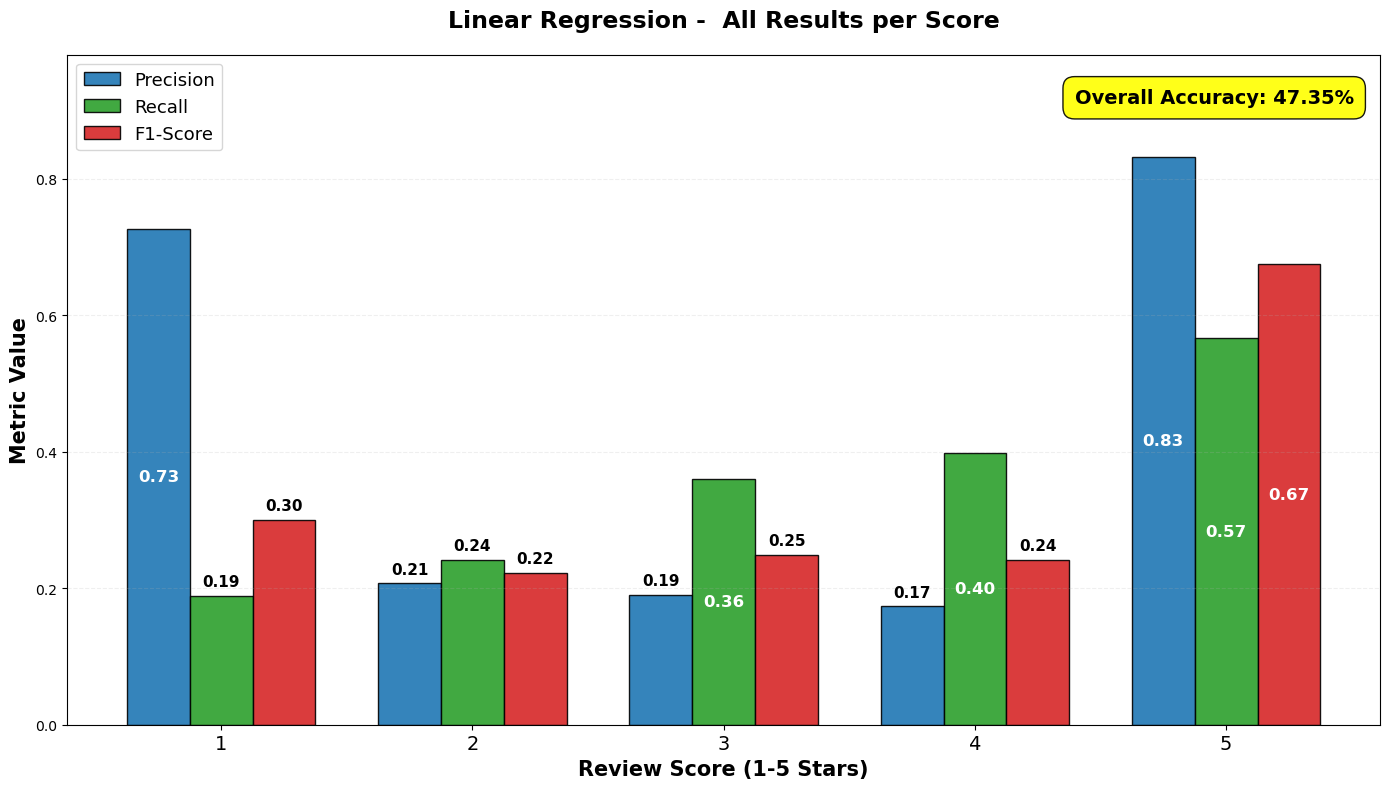

In [68]:
#Visualization of Results with LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_cont = lin.predict(X_test)
y_pred_lin = np.clip(np.round(y_pred_cont), 1, 5)

# Adding above calculated matrices
precision_lin = precision_score(y_test, y_pred_lin, average=None)
recall_lin = recall_score(y_test, y_pred_lin, average=None)
f1_lin = f1_score(y_test, y_pred_lin, average=None)
accuracy_lin = accuracy_score(y_test, y_pred_lin)

# Creating graph
plt.figure(figsize=(14, 8))

x = np.arange(len(precision_lin))
width = 0.25

# Creating bars 
bars_precision = plt.bar(x - width, precision_lin, width, 
                         label='Precision', color='#1f77b4', alpha=0.9, edgecolor='black')
bars_recall = plt.bar(x, recall_lin, width, 
                      label='Recall', color='#2ca02c', alpha=0.9, edgecolor='black')
bars_f1 = plt.bar(x + width, f1_lin, width, 
                  label='F1-Score', color='#d62728', alpha=0.9, edgecolor='black')

plt.xlabel('Review Score (1-5 Stars)', fontsize=15, fontweight='bold')
plt.ylabel('Metric Value', fontsize=15, fontweight='bold')
plt.title('Linear Regression -  All Results per Score', 
          fontsize=17, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'], 
           fontsize=14)

# Adding value labels (for handling very low values)
for i, (p, r, f) in enumerate(zip(precision_lin, recall_lin, f1_lin)):
    if p > 0.3:
        plt.text(i - width, p/2, f'{p:.2f}', ha='center', va='center', 
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i - width, p + 0.01, f'{p:.2f}', ha='center', va='bottom', 
                fontsize=11, fontweight='bold', color='black')
        
    if r > 0.3:
        plt.text(i, r/2, f'{r:.2f}', ha='center', va='center', 
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i, r + 0.01, f'{r:.2f}', ha='center', va='bottom', 
                fontsize=11, fontweight='bold', color='black')
    
    if f > 0.3:
        plt.text(i + width, f/2, f'{f:.2f}', ha='center', va='center', 
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i + width, f + 0.01, f'{f:.2f}', ha='center', va='bottom', 
                fontsize=11, fontweight='bold', color='black')

plt.legend(loc='upper left', fontsize=13)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')

max_value = max(max(precision_lin), max(recall_lin), max(f1_lin))
plt.ylim(0, max_value + 0.15)

#Overall Accuracy
accuracy_text = f'Overall Accuracy: {accuracy_lin:.2%}'
plt.text(0.98, 0.95, accuracy_text, 
         transform=plt.gca().transAxes, 
         fontsize=14, 
         fontweight='bold',
         ha='right',
         va='top',
         bbox=dict(boxstyle='round', 
                  facecolor='yellow',  
                  alpha=0.9, 
                  edgecolor='black',
                  pad=0.6))
plt.tight_layout()
plt.show()

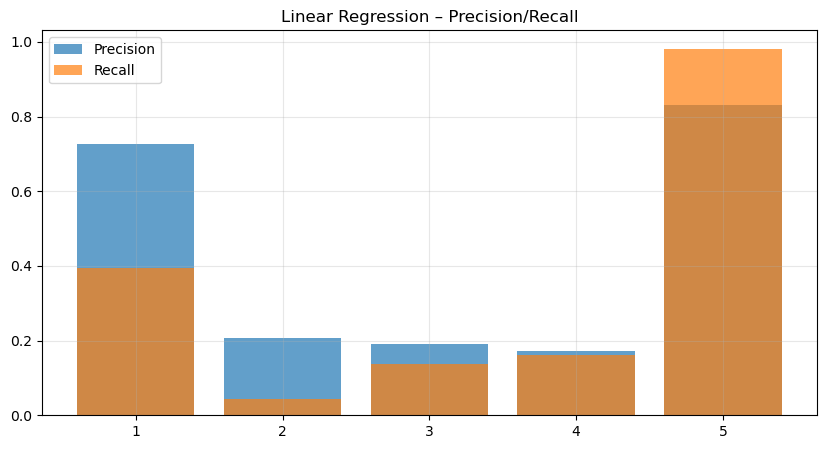

In [69]:
#Visualization of Precision/Recall Results with LinearRegression

plt.figure(figsize=(10,5))
plt.bar(range(5), precision_k, alpha=0.7, label='Precision')
plt.bar(range(5), recall_k, alpha=0.7, label='Recall')
plt.title("Linear Regression – Precision/Recall")
plt.xticks(range(5), ['1','2','3','4','5'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [70]:
#Naive Bayes

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

# 2) Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) TF-IDF for converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [72]:
#Accurency using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predicted_nb = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predicted_nb):.2%}")

Accuracy: 64.03%


In [73]:
#Precission using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predicted_nb = nb.predict(X_test)

print(f"Precision: {precision_score(y_test, y_predicted_nb, average='weighted'):.2%}")

Precision: 56.83%


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
#Precission using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predicted_nb = nb.predict(X_test)

print(f"Recall: {recall_score(y_test, y_predicted_nb, average='weighted'):.2%}")

Recall: 64.03%


In [75]:
#F1-Score using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predicted_nb = nb.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_predicted_nb, average='weighted'):.2%}")

F1 Score: 51.76%


In [76]:
#Results per scores with NaiveBayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_predicted_nb = nb.predict(X_test)

precision_cls = precision_score(y_test, y_predicted_nb, average=None)
recall_cls = recall_score(y_test, y_predicted_nb, average=None)

for i in range(5):
    print(f"Score {i+1}:")
    print(f"  Precision: {precision_cls[i]:.2%}")
    print(f"  Recall: {recall_cls[i]:.2%}")
    f1 = 2 * (precision_cls[i] * recall_cls[i]) / (precision_cls[i] + recall_cls[i] + 1e-10)
    print(f"  F1: {f1:.2%}\n")

Score 1:
  Precision: 78.38%
  Recall: 7.95%
  F1: 14.43%

Score 2:
  Precision: 0.00%
  Recall: 0.00%
  F1: 0.00%

Score 3:
  Precision: 42.86%
  Recall: 1.82%
  F1: 3.49%

Score 4:
  Precision: 40.35%
  Recall: 4.06%
  F1: 7.37%

Score 5:
  Precision: 64.31%
  Recall: 99.56%
  F1: 78.15%



C:\Users\win11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
#Random Forest Classifier

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#TF-IDF converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)


In [79]:
#Accurancy using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2%}")

Accuracy: 66.22%


In [84]:
#Precision using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2%}")

Precision: 74.88%


In [85]:
#Recall using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2%}")

Recall: 66.22%


In [86]:
#F1 Score using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2%}")

F1 Score: 55.78%


In [87]:
#Results per scores with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

precision_cls = precision_score(y_test, y_pred_rf, average=None)
recall_cls = recall_score(y_test, y_pred_rf, average=None)

for i in range(5):
    print(f"Score {i+1}:")
    print(f"  Precision: {precision_cls[i]:.2%}")
    print(f"  Recall: {recall_cls[i]:.2%}")
    f1 = 2 * (precision_cls[i] * recall_cls[i]) / (precision_cls[i] + recall_cls[i] + 1e-10)
    print(f"  F1: {f1:.2%}\n")

Score 1:
  Precision: 97.92%
  Recall: 12.88%
  F1: 22.76%

Score 2:
  Precision: 100.00%
  Recall: 8.93%
  F1: 16.39%

Score 3:
  Precision: 86.67%
  Recall: 7.88%
  F1: 14.44%

Score 4:
  Precision: 86.00%
  Recall: 7.58%
  F1: 13.94%

Score 5:
  Precision: 65.24%
  Recall: 99.96%
  F1: 78.95%



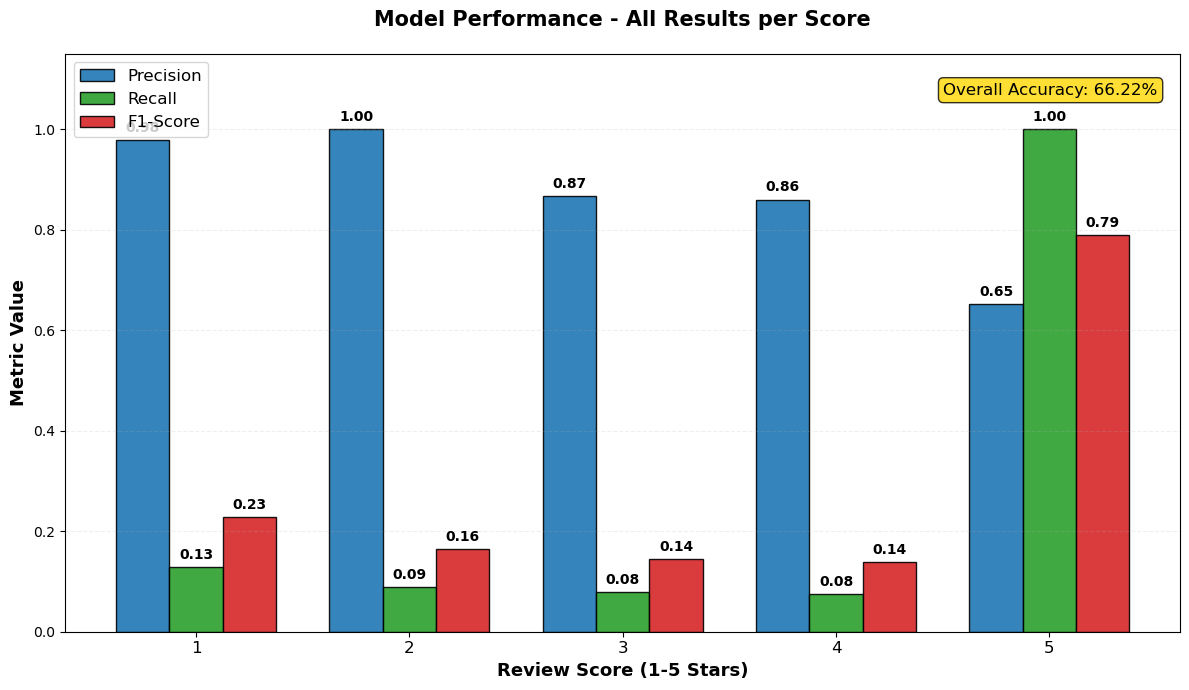

In [88]:
#Visualization of results in RANDOM FOREST:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

# Adding above calculated matrices
precision_k = precision_score(y_test, y_predicted, average=None)
recall_k = recall_score(y_test, y_predicted, average=None)
f1_k = f1_score(y_test, y_predicted, average=None)
accuracy = accuracy_score(y_test, y_predicted)

# Creating graph
plt.figure(figsize=(12, 7))

x = np.arange(len(precision_k))
width = 0.25

# Creating bars for each metric
bars_precision = plt.bar(x - width, precision_k, width, 
                         label='Precision', color='#1f77b4', alpha=0.9, edgecolor='black')
bars_recall = plt.bar(x, recall_k, width, 
                      label='Recall', color='#2ca02c', alpha=0.9, edgecolor='black')
bars_f1 = plt.bar(x + width, f1_k, width, 
                  label='F1-Score', color='#d62728', alpha=0.9, edgecolor='black')

plt.xlabel('Review Score (1-5 Stars)', fontsize=13, fontweight='bold')
plt.ylabel('Metric Value', fontsize=13, fontweight='bold')
plt.title('Model Performance - All Results per Score', 
          fontsize=15, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'], 
           fontsize=12)

for bars in [bars_precision, bars_recall, bars_f1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')
plt.ylim(0, max(max(precision_k), max(recall_k), max(f1_k)) + 0.15)

# Overall Accuracy
plt.text(0.98, 0.95, f'Overall Accuracy: {accuracy:.2%}', 
         transform=plt.gca().transAxes, fontsize=12,
         ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.show()

In [89]:
#Support Vector Machine (SVM)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#TF-IDF converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [91]:
#Accuracy Using Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2%}")

Accuracy: 70.15%


In [92]:
#Precission Using Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.2%}")

Precision: 66.09%


In [93]:
#Recall Using Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.2%}")

Recall: 70.15%


In [94]:
#F1-Score Using Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2%}")

F1 Score: 67.35%


In [95]:
#All Metric per Classes (using SVM)
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

precision_cls = precision_score(y_test, y_pred_svm, average=None)
recall_cls = recall_score(y_test, y_pred_svm, average=None)

for i in range(5):
    print(f"Score {i+1}:")
    print(f"  Precision: {precision_cls[i]:.2%}")
    print(f"  Recall: {recall_cls[i]:.2%}")
    f1 = 2 * (precision_cls[i] * recall_cls[i]) / (precision_cls[i] + recall_cls[i] + 1e-10)
    print(f"  F1: {f1:.2%}\n")

Score 1:
  Precision: 62.86%
  Recall: 60.27%
  F1: 61.54%

Score 2:
  Precision: 37.30%
  Recall: 20.98%
  F1: 26.86%

Score 3:
  Precision: 41.82%
  Recall: 27.88%
  F1: 33.45%

Score 4:
  Precision: 38.59%
  Recall: 25.04%
  F1: 30.37%

Score 5:
  Precision: 78.51%
  Recall: 91.69%
  F1: 84.59%



In [96]:
#Visualization of Metrics Results in Support Vector Machine (SVM)

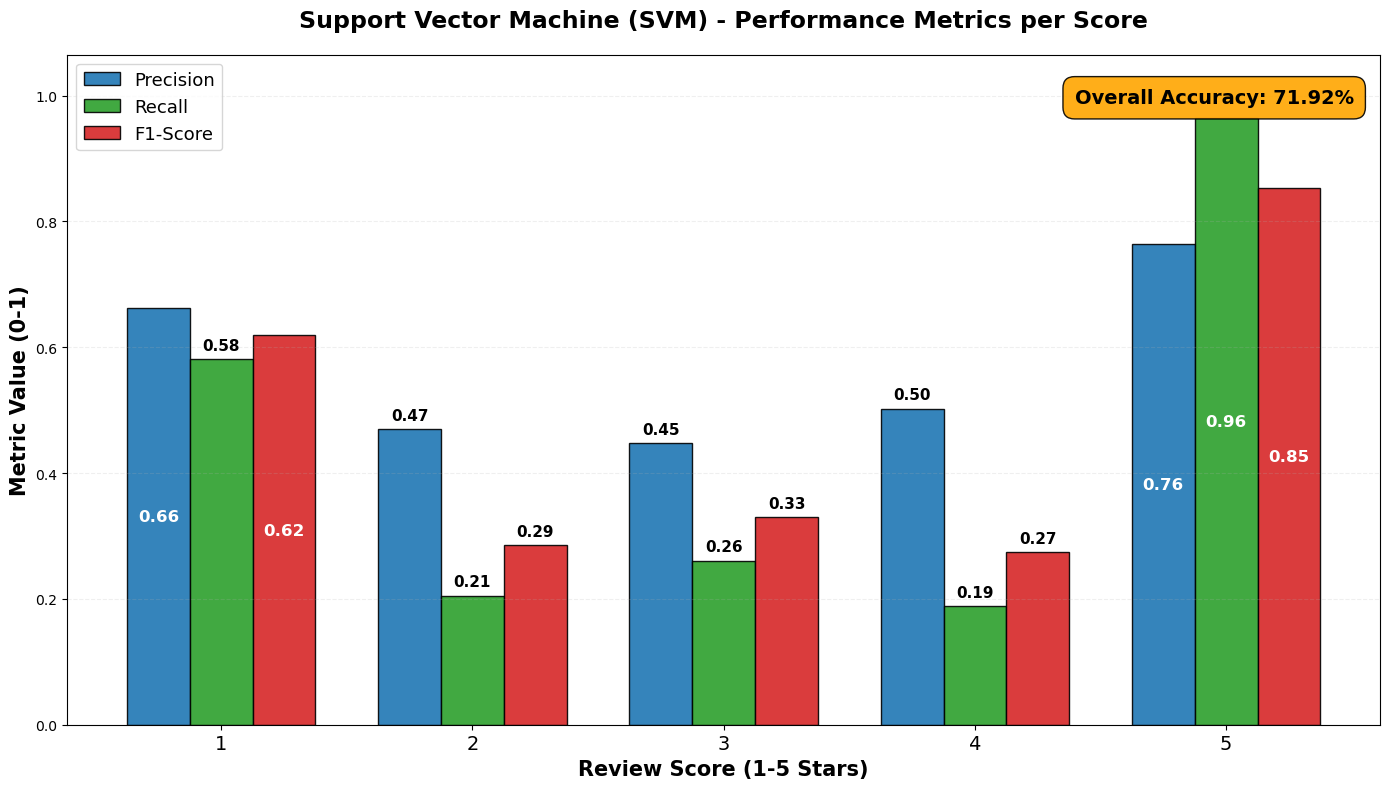

In [97]:
# SVM MODEL WITH VISUALIZATION
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

svm_model = SVC(
    kernel='linear',      
    C=1.0,                
    random_state=42,
    verbose=False)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

#Setting above metrics
precision_svm = precision_score(y_test, y_pred_svm, average=None)
recall_svm = recall_score(y_test, y_pred_svm, average=None)
f1_svm = f1_score(y_test, y_pred_svm, average=None)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Graphical visualization
plt.figure(figsize=(14, 8))

x = np.arange(len(precision_svm))
width = 0.25

# Adding bars
bars_precision = plt.bar(x - width, precision_svm, width,
                         label='Precision', color='#1f77b4', alpha=0.9, edgecolor='black')
bars_recall = plt.bar(x, recall_svm, width,
                      label='Recall', color='#2ca02c', alpha=0.9, edgecolor='black')
bars_f1 = plt.bar(x + width, f1_svm, width,
                  label='F1-Score', color='#d62728', alpha=0.9, edgecolor='black')

plt.xlabel('Review Score (1-5 Stars)', fontsize=15, fontweight='bold')
plt.ylabel('Metric Value (0-1)', fontsize=15, fontweight='bold')
plt.title('Support Vector Machine (SVM) - Performance Metrics per Score',
          fontsize=17, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'],
           fontsize=14)

# Adding value labels with special handling
for i, (p, r, f) in enumerate(zip(precision_svm, recall_svm, f1_svm)):
    if p > 0.6:
        plt.text(i - width, p/2, f'{p:.2f}',
                ha='center', va='center',
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i - width, p + 0.01, f'{p:.2f}',
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')
    
    if r > 0.6:
        plt.text(i, r/2, f'{r:.2f}',
                ha='center', va='center',
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i, r + 0.01, f'{r:.2f}',
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')
    
    if f > 0.6:
        plt.text(i + width, f/2, f'{f:.2f}',
                ha='center', va='center',
                fontsize=12, fontweight='bold', color='white')
    else:
        plt.text(i + width, f + 0.01, f'{f:.2f}',
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')

plt.legend(loc='upper left', fontsize=13)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')

# Seting y
max_value = max(max(precision_svm), max(recall_svm), max(f1_svm))
plt.ylim(0, max_value + 0.1)

# Overall Accuracy
accuracy_text = f'Overall Accuracy: {accuracy_svm:.2%}'
plt.text(0.98, 0.95, accuracy_text,
         transform=plt.gca().transAxes,
         fontsize=14,
         fontweight='bold',
         ha='right',
         va='top',
         bbox=dict(boxstyle='round',
                  facecolor='orange',  
                  alpha=0.9,
                  edgecolor='black',
                  pad=0.6))

plt.tight_layout()
plt.show()

In [98]:
#Artificial Neural Network (ANN)

In [99]:
#Trening-Test Spliting dataset 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# On only 20000 rows
df_small = df.head(20000)


X_text = df_small['Text'] # Text  
y = df_small['Score'] #Target

#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#TF-IDF converting text into number
tfidf = TfidfVectorizer(max_features=5000)

X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [100]:
#Accuracy in ANN
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,          
    random_state=42
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.2%}")

Accuracy: 67.25%


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [101]:
#Precision in ANN
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,          
    random_state=42
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred_ann, average='weighted'):.2%}")

Precision: 65.77%


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
#Recall in ANN
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,          
    random_state=42
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print(f"Recall: {recall_score(y_test, y_pred_ann, average='weighted'):.2%}")

Recall: 67.25%


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:
#F1-Score in ANN
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,          
    random_state=42
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print(f"F1 Score: {f1_score(y_test, y_pred_ann, average='weighted'):.2%}")

F1 Score: 66.42%


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
#Results of Metric per Scores using ANN
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,          
    random_state=42
)

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

precision_cls = precision_score(y_test, y_pred_ann, average=None)
recall_cls = recall_score(y_test, y_pred_ann, average=None)

for i in range(5):
    print(f"Score {i+1}:")
    print(f"  Precision: {precision_cls[i]:.2%}")
    print(f"  Recall: {recall_cls[i]:.2%}")
    f1 = 2 * (precision_cls[i] * recall_cls[i]) / (precision_cls[i] + recall_cls[i] + 1e-10)
    print(f"  F1: {f1:.2%}\n")

Score 1:
  Precision: 58.65%
  Recall: 64.11%
  F1: 61.26%

Score 2:
  Precision: 32.14%
  Recall: 24.11%
  F1: 27.55%

Score 3:
  Precision: 35.37%
  Recall: 31.52%
  F1: 33.33%

Score 4:
  Precision: 34.43%
  Recall: 31.39%
  F1: 32.84%

Score 5:
  Precision: 80.85%
  Recall: 84.33%
  F1: 82.55%



C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


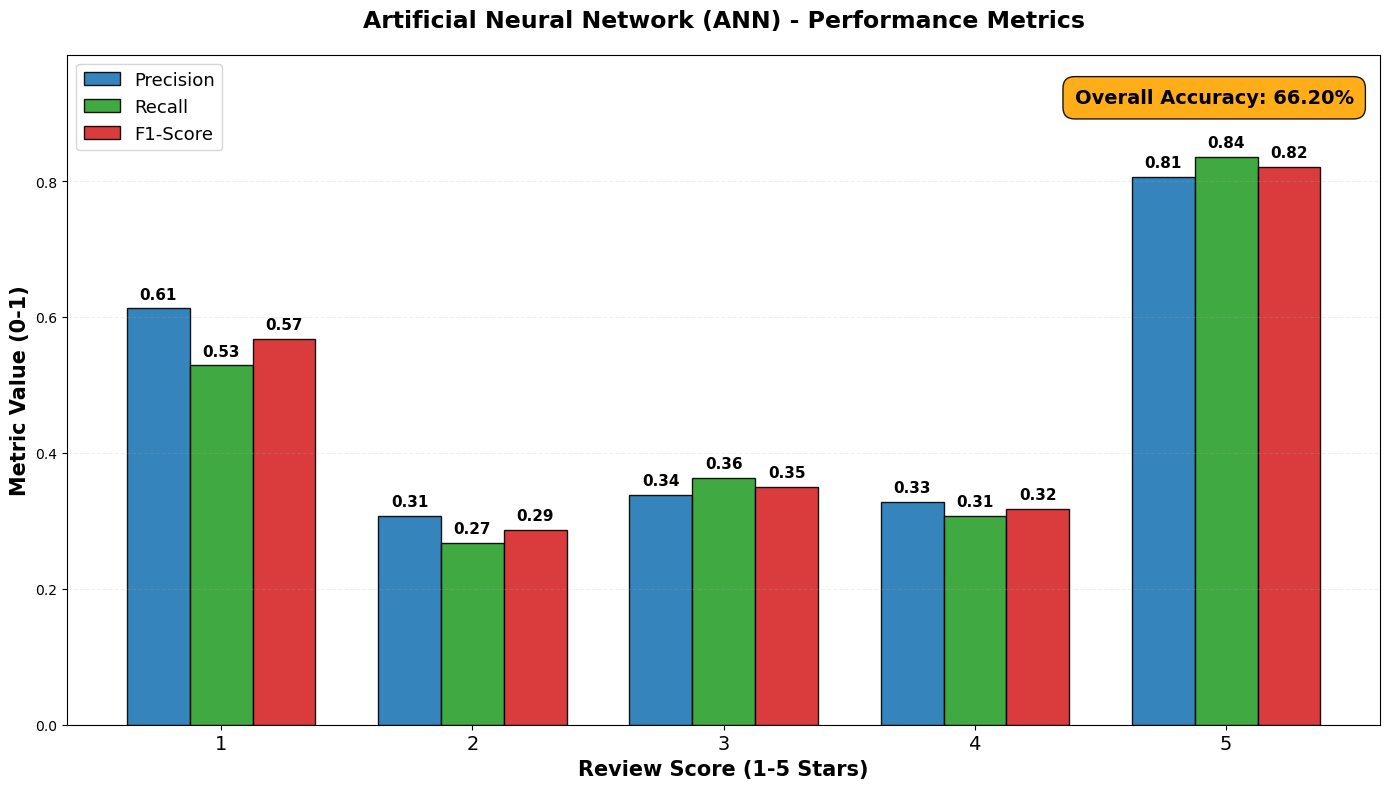

In [105]:
# Visual Representation of Metrics using ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

ann_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    solver='adam',                 
    alpha=0.0001,                 
    batch_size='auto',             
    learning_rate='adaptive',      
    max_iter=500,                  # Maksimalan broj iteracija
    random_state=42,
    verbose=False
)

ann_model.fit(X_train, y_train)

y_pred_ann = ann_model.predict(X_test)

# Above calculated metrics
precision_ann = precision_score(y_test, y_pred_ann, average=None)
recall_ann = recall_score(y_test, y_pred_ann, average=None)
f1_ann = f1_score(y_test, y_pred_ann, average=None)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Graph 
plt.figure(figsize=(14, 8))

x = np.arange(len(precision_ann))
width = 0.25

# Creating bars
bars_precision = plt.bar(x - width, precision_ann, width,
                         label='Precision', color='#1f77b4', alpha=0.9, edgecolor='black')
bars_recall = plt.bar(x, recall_ann, width,
                      label='Recall', color='#2ca02c', alpha=0.9, edgecolor='black')
bars_f1 = plt.bar(x + width, f1_ann, width,
                  label='F1-Score', color='#d62728', alpha=0.9, edgecolor='black')

plt.xlabel('Review Score (1-5 Stars)', fontsize=15, fontweight='bold')
plt.ylabel('Metric Value (0-1)', fontsize=15, fontweight='bold')
plt.title('Artificial Neural Network (ANN) - Performance Metrics',
          fontsize=17, fontweight='bold', pad=20)

plt.xticks(x, ['1', '2', '3', '4', '5'],
           fontsize=14)

# Add value labels
for bars in [bars_precision, bars_recall, bars_f1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', 
                fontsize=11, fontweight='bold')

plt.legend(loc='upper left', fontsize=13)
plt.grid(True, alpha=0.2, linestyle='--', axis='y')

# Seting y-limit
max_value = max(max(precision_ann), max(recall_ann), max(f1_ann))
plt.ylim(0, max_value + 0.15)

# Overall Accuracy
accuracy_text = f'Overall Accuracy: {accuracy_ann:.2%}'
plt.text(0.98, 0.95, accuracy_text,
         transform=plt.gca().transAxes,
         fontsize=14,
         fontweight='bold',
         ha='right',
         va='top',
         bbox=dict(boxstyle='round',
                  facecolor='orange',
                  alpha=0.9,
                  edgecolor='black',
                  pad=0.6))

plt.tight_layout()
plt.show()

In [106]:
#Second ML Case : TEXT → IsHelpful (Helpfulness Prediction)

In [107]:
#Data preparation : 

In [108]:
# Target variables
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1e-10)
df['IsHelpful'] = (df['HelpfulnessRatio'] > 0.5).astype(int)

In [109]:
#Limitation on only 20000 rows
df_small = df.head(20000)

In [110]:
X_text = df_small['Text']  # Text  
y = df_small['IsHelpful']  # Target 

In [111]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [112]:
# Creating TF-IDF for converting Text into numeric value
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [198]:
#Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.67566554, 0.6688543 , 0.67560473])

In [117]:
#Alghoritms

In [118]:
# kNN Classifier

In [119]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [120]:
# Creating TF-IDF for converting Text into numeric value
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [121]:
#Accuracy with kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predicted_kn):.2f}")

Accuracy: 0.63


In [122]:
#Precision with kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Precision: {precision_score(y_test, y_predicted_kn, average='weighted'):.2%}")

Precision: 60.52%


In [123]:
#Recall with kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predicted_kn = knn.predict(X_test)

print(f"Recall: {recall_score(y_test, y_predicted_kn, average='weighted'):.2%}")

Recall: 62.58%


In [124]:
#F1-Score with kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_predicted_kn = knn.predict(X_test)

print(f"F1-Score: {f1_score(y_test, y_predicted_kn, average='weighted'):.2%}")

F1-Score: 59.98%


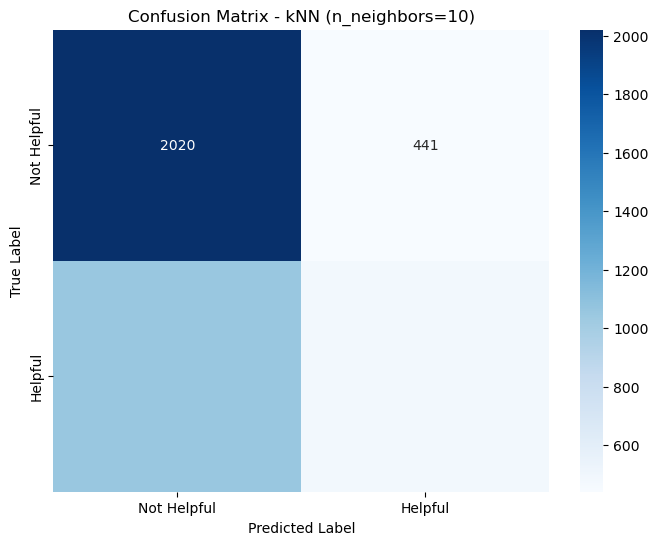

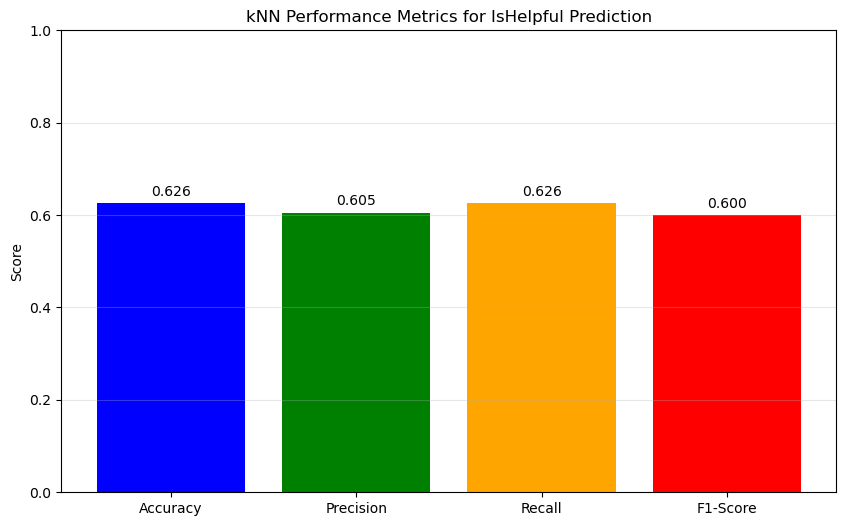

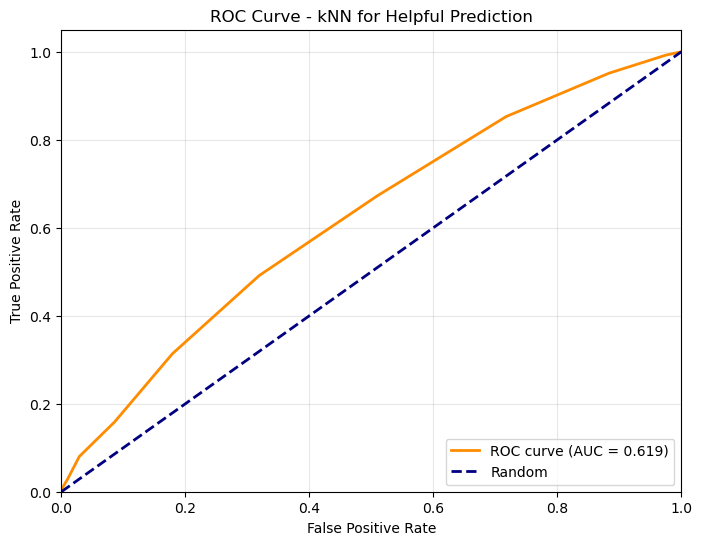

In [125]:
#Viualization of Metrics with kNN()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_predicted_kn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Helpful', 'Helpful'], 
            yticklabels=['Not Helpful', 'Helpful'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - kNN (n_neighbors={knn.n_neighbors})')
plt.show()

#Bar plot za Accuracy, Precision, Recall, F1
metrics = {
    'Accuracy': accuracy_score(y_test, y_predicted_kn),
    'Precision': precision_score(y_test, y_predicted_kn, average='weighted'),
    'Recall': recall_score(y_test, y_predicted_kn, average='weighted'),
    'F1-Score': f1_score(y_test, y_predicted_kn, average='weighted')
}

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('kNN Performance Metrics for IsHelpful Prediction')
plt.ylabel('Score')
plt.ylim(0, 1)

#Adding bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()

#ROC Curve
from sklearn.metrics import roc_curve, auc

# Ako model ima predict_proba
if hasattr(knn, 'predict_proba'):
    y_pred_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - kNN for Helpful Prediction')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

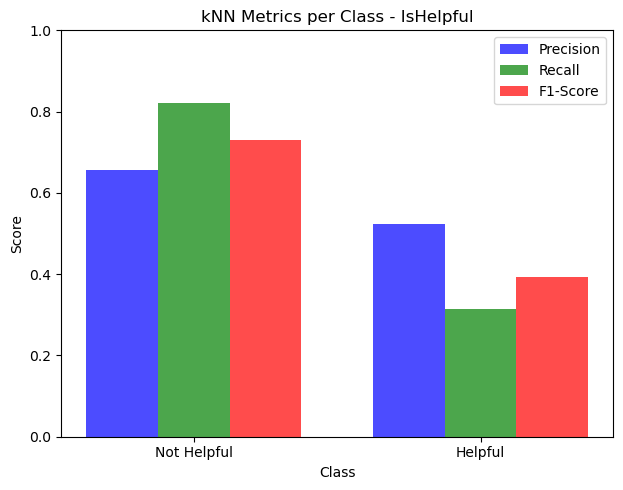

In [126]:
# Vizualizacija za kNN
precision_per_class = precision_score(y_test, y_predicted_kn, average=None)
recall_per_class = recall_score(y_test, y_predicted_kn, average=None)
f1_per_class = f1_score(y_test, y_predicted_kn, average=None)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x = np.arange(2)
width = 0.25
bars1 = plt.bar(x - width, precision_per_class, width, label='Precision', color='blue', alpha=0.7)
bars2 = plt.bar(x, recall_per_class, width, label='Recall', color='green', alpha=0.7)
bars3 = plt.bar(x + width, f1_per_class, width, label='F1-Score', color='red', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('kNN Metrics per Class - IsHelpful')
plt.xticks(x, ['Not Helpful', 'Helpful'])
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [127]:
# Logistic Regression

In [128]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [129]:
#Accuracy with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predicted_LR):.2f}")

Accuracy: 0.62


In [130]:
#Precision with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_predicted_LR = logreg.predict(X_test)

print(f"Precision: {precision_score(y_test, y_predicted_LR, average='weighted'):.2%}")

Precision: 60.56%


In [134]:
# Linear Regression 

In [135]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [136]:
# Linear Regression Accuracy

In [137]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
import numpy as np
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_cont = lin.predict(X_test)
y_pred_lr = np.clip(np.round(y_pred_cont), 0, 1)  # Zaokruži na 0 ili 1

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")

Accuracy: 0.595


In [138]:
# Naive Bayes 

In [139]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [140]:
# Naive Bayes Accuracy
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_predicted_nb = nb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predicted_nb):.3f}")

Accuracy: 0.630


In [141]:
#Random Forest

In [142]:
# Random Forest Accuracy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Accuracy: 0.646


In [143]:
# SVM 

In [144]:
# SVM Accuracy
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

Accuracy: 0.610


In [145]:
# ANN 

In [146]:
# ANN Accuracy
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', 
                    solver='adam', max_iter=20, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_ann):.3f}")

Accuracy: 0.604


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [147]:
# Third ML Case : Identification of "Professional" Reviews 

In [148]:
# Setting target variable
user_review_counts = df['UserId'].value_counts()
df['UserReviewCount'] = df['UserId'].map(user_review_counts)
df['IsPowerUser'] = (df['UserReviewCount'] > 5).astype(int)  # >5 recenzija = power user

In [149]:
#Limiting on 20000
df_small = df.head(20000)

In [150]:
# X and Y
X_text = df_small['Summary']  
y = df_small['IsPowerUser']  # Target 

In [151]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [152]:
# Creating TF-IDF for converting Text into numeric value
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [153]:
print(f"Trening set: {X_train.shape[0]} recenzija")
print(f"Test set: {X_test.shape[0]} recenzija")
print(f"Distribution: {y_train.mean():.1%} power users\n")

Trening set: 16000 recenzija
Test set: 4000 recenzija
Distribution: 36.4% power users



In [154]:
#Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.66910386, 0.67091693, 0.66041628])

In [157]:
#Alghoritms

In [158]:
# X and Y
X_text = df_small['Summary']  
y = df_small['IsPowerUser']  # Target 

In [159]:
# Splitting dataset 
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [160]:
# kNN Classifier

In [161]:
#Accuracy with kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)
y_predicted_kn2 = knn2.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_predicted_kn2):.3f}")
print(f"Precision: {precision_score(y_test, y_predicted_kn2, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_predicted_kn2, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, y_predicted_kn2, average='weighted'):.3f}")

Accuracy: 0.649
Precision: 0.624
Recall: 0.649
F1-Score: 0.581


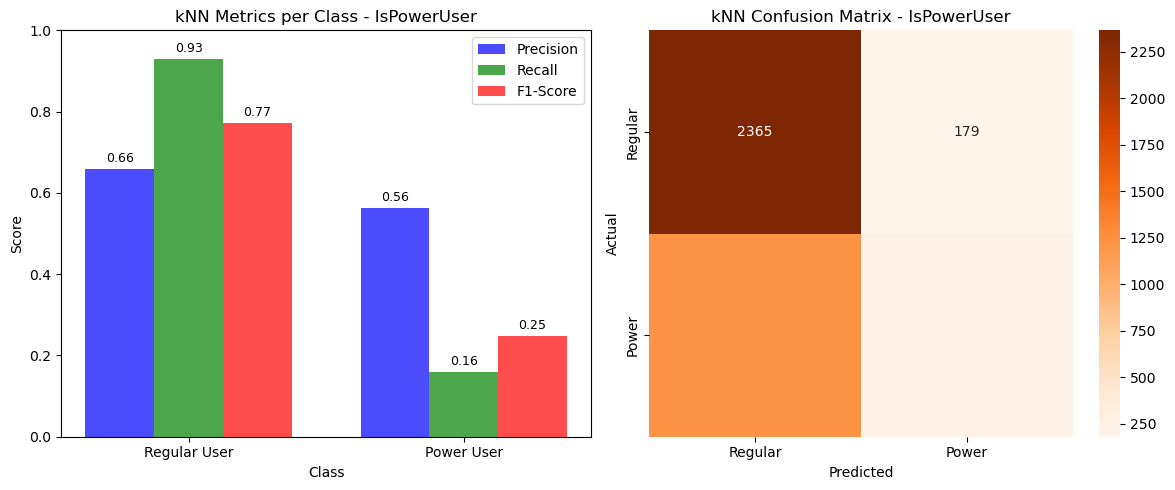

In [162]:
# Vizualization of kNN - PowerUser
precision_per_class2 = precision_score(y_test, y_predicted_kn2, average=None)
recall_per_class2 = recall_score(y_test, y_predicted_kn2, average=None)
f1_per_class2 = f1_score(y_test, y_predicted_kn2, average=None)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x = np.arange(2)
width = 0.25
bars1 = plt.bar(x - width, precision_per_class2, width, label='Precision', color='blue', alpha=0.7)
bars2 = plt.bar(x, recall_per_class2, width, label='Recall', color='green', alpha=0.7)
bars3 = plt.bar(x + width, f1_per_class2, width, label='F1-Score', color='red', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('kNN Metrics per Class - IsPowerUser')
plt.xticks(x, ['Regular User', 'Power User'])
plt.legend()
plt.ylim(0, 1)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.subplot(1, 2, 2)
cm_knn2 = confusion_matrix(y_test, y_predicted_kn2)
sns.heatmap(cm_knn2, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Regular', 'Power'], 
            yticklabels=['Regular', 'Power'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix - IsPowerUser')

plt.tight_layout()
plt.show()

In [163]:
# Logistic Regression

In [164]:
# Logistic Regression Accuracy
logreg2 = LogisticRegression(max_iter=200, random_state=42)
logreg2.fit(X_train, y_train)
y_predicted_LR2 = logreg2.predict(X_test)
print(f" PowerUser Accuracy: {accuracy_score(y_test, y_predicted_LR2):.2f}")

 PowerUser Accuracy: 0.67


In [165]:
# Random Forest

In [166]:
# Random Forest Accuracy
rf2 = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
print(f"PowerUser Accuracy: {accuracy_score(y_test, y_pred_rf2):.3f}")

PowerUser Accuracy: 0.664


In [167]:
#SVM 

In [168]:
# SVM Accuracy
svm2 = LinearSVC(random_state=42)
svm2.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)
print(f"PowerUser Accuracy: {accuracy_score(y_test, y_pred_svm2):.3f}")

PowerUser Accuracy: 0.658


In [169]:
# ANN 

In [170]:
# ANN Accuracy
ann2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', 
                     solver='adam', max_iter=20, random_state=42)
ann2.fit(X_train, y_train)
y_pred_ann2 = ann2.predict(X_test)
print(f"PowerUser Accuracy: {accuracy_score(y_test, y_pred_ann2):.3f}")

PowerUser Accuracy: 0.645


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [171]:
# Fourth ML Case : Time Analysis

In [172]:
#Converting Time into datetime
df['Timestamp'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Timestamp'].dt.year

In [173]:
#Target: review before/after 2010
df['IsRecent'] = (df['Year'] > 2010).astype(int)

In [174]:
#Limitation on 20.000
df_small = df.head(20000)

In [175]:
# X and Y
X_text = df_small['Text']  
y = df_small['IsRecent']  # Target (0 = before 2010, 1 = after 2010)

In [176]:
#Spliting dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [177]:
# Converting Text into numeric with TF-IDF
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

print(f"Trening set: {X_train.shape[0]} rewievs")
print(f"Test set: {X_test.shape[0]} rewievs")
print(f"Distribution: {y_train.mean():.1%} new rewievs (after 2010)\n")

Trening set: 16000 rewievs
Test set: 4000 rewievs
Distribution: 62.3% new rewievs (after 2010)



In [178]:
#Alghoritms

In [179]:
# kNN

In [180]:
#kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

knn3 = KNeighborsClassifier(n_neighbors=10)
knn3.fit(X_train, y_train)
y_predicted_kn3 = knn3.predict(X_test)

print(f"kNN Results :")
print(f"Accuracy: {accuracy_score(y_test, y_predicted_kn3):.2f}")
print(f"Precision: {precision_score(y_test, y_predicted_kn3, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicted_kn3, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_predicted_kn3, average='weighted'):.2f}")

kNN Results :
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1-Score: 0.64


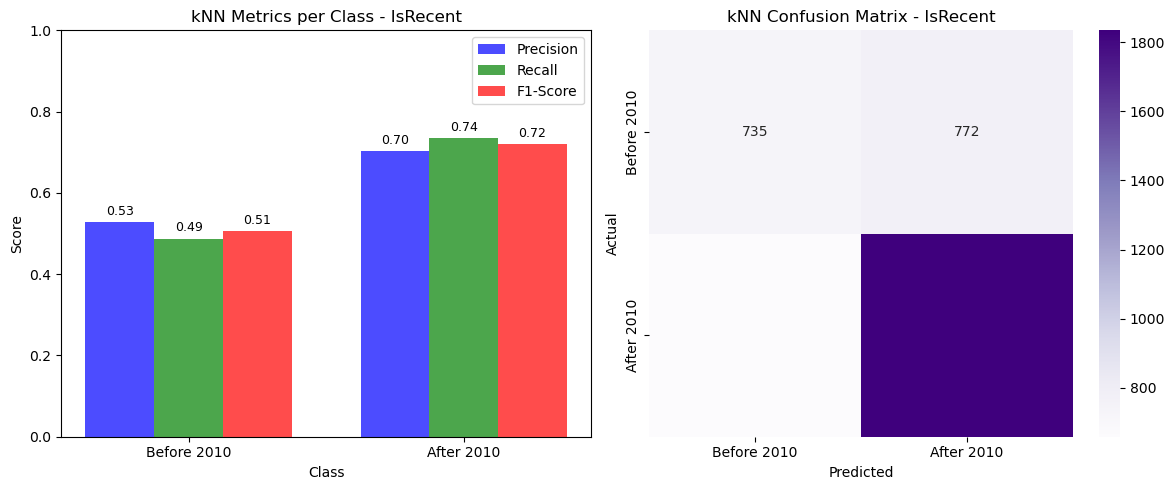

In [181]:
# Visualization for  kNN - IsRecent
precision_per_class3 = precision_score(y_test, y_predicted_kn3, average=None)
recall_per_class3 = recall_score(y_test, y_predicted_kn3, average=None)
f1_per_class3 = f1_score(y_test, y_predicted_kn3, average=None)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x = np.arange(2)
width = 0.25
bars1 = plt.bar(x - width, precision_per_class3, width, label='Precision', color='blue', alpha=0.7)
bars2 = plt.bar(x, recall_per_class3, width, label='Recall', color='green', alpha=0.7)
bars3 = plt.bar(x + width, f1_per_class3, width, label='F1-Score', color='red', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('kNN Metrics per Class - IsRecent')
plt.xticks(x, ['Before 2010', 'After 2010'])
plt.legend()
plt.ylim(0, 1)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.subplot(1, 2, 2)
cm_knn3 = confusion_matrix(y_test, y_predicted_kn3)
sns.heatmap(cm_knn3, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Before 2010', 'After 2010'], 
            yticklabels=['Before 2010', 'After 2010'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix - IsRecent')

plt.tight_layout()
plt.show()

In [182]:
#Logistical Regression

In [183]:
# Logistic Regression Accuracy
from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(max_iter=200, random_state=42)
logreg3.fit(X_train, y_train)
y_predicted_LR3 = logreg3.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_predicted_LR3):.3f}") #(IsRecent) 

Logistic Regression Accuracy: 0.675


In [184]:
#Random Forest 

In [185]:
# Random Forest Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf3 = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)
rf3.fit(X_train, y_train)
y_pred_rf3 = rf3.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf3):.3f}")

Random Forest Accuracy: 0.697


In [186]:
# SVM

In [187]:
# SVM Accuracy 
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

svm3 = LinearSVC(random_state=42)
svm3.fit(X_train, y_train)
y_pred_svm3 = svm3.predict(X_test)
print(f"SVM  Accuracy: {accuracy_score(y_test, y_pred_svm3):.2f}")

SVM  Accuracy: 0.65


In [188]:
#ANN

In [189]:
# ANN Accuracy 

ann3 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', 
                     solver='adam', max_iter=20, random_state=42)
ann3.fit(X_train, y_train)
y_pred_ann3 = ann3.predict(X_test)
print(f"ANN Accuracy: {accuracy_score(y_test, y_pred_ann3):.3f}")

ANN Accuracy: 0.654


C:\Users\win11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [190]:
results_summary = {
    'Model': ['kNN', 'Logistic Regression', 'Random Forest', 'SVM', 'ANN'],
    'IsHelpful Accuracy': [
        accuracy_score(y_test, y_predicted_kn),
        accuracy_score(y_test, y_predicted_LR),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_ann)
    ],
    'IsPowerUser Accuracy': [
        accuracy_score(y_test, y_predicted_kn2),
        accuracy_score(y_test, y_predicted_LR2),
        accuracy_score(y_test, y_pred_rf2),
        accuracy_score(y_test, y_pred_svm2),
        accuracy_score(y_test, y_pred_ann2)
    ],
    'IsRecent Accuracy': [
        accuracy_score(y_test, y_predicted_kn3),
        accuracy_score(y_test, y_predicted_LR3),
        accuracy_score(y_test, y_pred_rf3),
        accuracy_score(y_test, y_pred_svm3),
        accuracy_score(y_test, y_pred_ann3)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results_summary)
print("\nAll model metrics:")
print(results_df.to_string(index=False))

# Vizualization compered results 
plt.figure(figsize=(14, 8))


All model metrics:
              Model  IsHelpful Accuracy  IsPowerUser Accuracy  IsRecent Accuracy
                kNN             0.42575               0.39525            0.64225
Logistic Regression             0.44125               0.40900            0.67550
      Random Forest             0.40475               0.41225            0.69700
                SVM             0.45575               0.42550            0.64850
                ANN             0.47150               0.42675            0.65425


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

(0.0, 1.0)

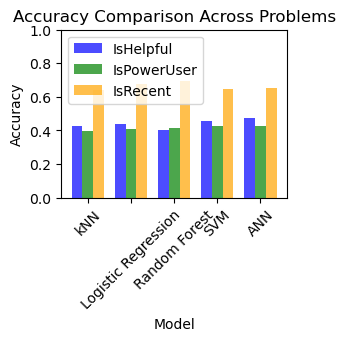

In [191]:
x = np.arange(len(results_df))
width = 0.25

plt.subplot(2, 2, 1)
plt.bar(x - width, results_df['IsHelpful Accuracy'], width, label='IsHelpful', color='blue', alpha=0.7)
plt.bar(x, results_df['IsPowerUser Accuracy'], width, label='IsPowerUser', color='green', alpha=0.7)
plt.bar(x + width, results_df['IsRecent Accuracy'], width, label='IsRecent', color='orange', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Problems')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()
plt.ylim(0, 1)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'kNN'),
  Text(1.5, 0, 'Logistic Regression'),
  Text(2.5, 0, 'Random Forest'),
  Text(3.5, 0, 'SVM'),
  Text(4.5, 0, 'ANN')])

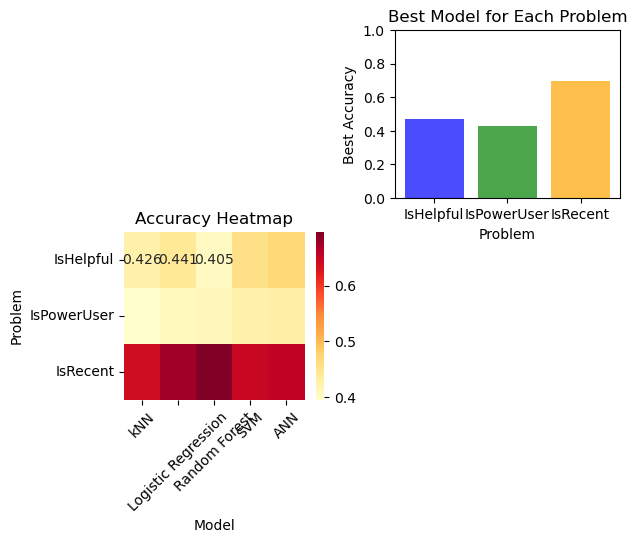

In [192]:
# Najbolji model za svaki problem
plt.subplot(2, 2, 2)
best_for_each = {
    'IsHelpful': results_df.loc[results_df['IsHelpful Accuracy'].idxmax(), 'Model'],
    'IsPowerUser': results_df.loc[results_df['IsPowerUser Accuracy'].idxmax(), 'Model'],
    'IsRecent': results_df.loc[results_df['IsRecent Accuracy'].idxmax(), 'Model']
}

plt.bar(best_for_each.keys(), 
        [results_df[results_df['Model'] == best_for_each['IsHelpful']]['IsHelpful Accuracy'].values[0],
         results_df[results_df['Model'] == best_for_each['IsPowerUser']]['IsPowerUser Accuracy'].values[0],
         results_df[results_df['Model'] == best_for_each['IsRecent']]['IsRecent Accuracy'].values[0]],
        color=['blue', 'green', 'orange'], alpha=0.7)
plt.xlabel('Problem')
plt.ylabel('Best Accuracy')
plt.title('Best Model for Each Problem')
plt.ylim(0, 1)

# Heatmap
plt.subplot(2, 2, 3)
heatmap_data = results_df[['IsHelpful Accuracy', 'IsPowerUser Accuracy', 'IsRecent Accuracy']].values.T
sns.heatmap(heatmap_data, 
            xticklabels=results_df['Model'], 
            yticklabels=['IsHelpful', 'IsPowerUser', 'IsRecent'],
            annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Accuracy Heatmap')
plt.xlabel('Model')
plt.ylabel('Problem')
plt.xticks(rotation=45)

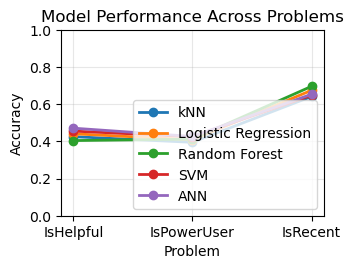

In [193]:
# Line plot trend
plt.subplot(2, 2, 4)
for i, model in enumerate(results_df['Model']):
    plt.plot(['IsHelpful', 'IsPowerUser', 'IsRecent'], 
             results_df.iloc[i, 1:].values, 
             marker='o', label=model, linewidth=2)
plt.xlabel('Problem')
plt.ylabel('Accuracy')
plt.title('Model Performance Across Problems')
plt.legend()
plt.ylim(0, 1)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

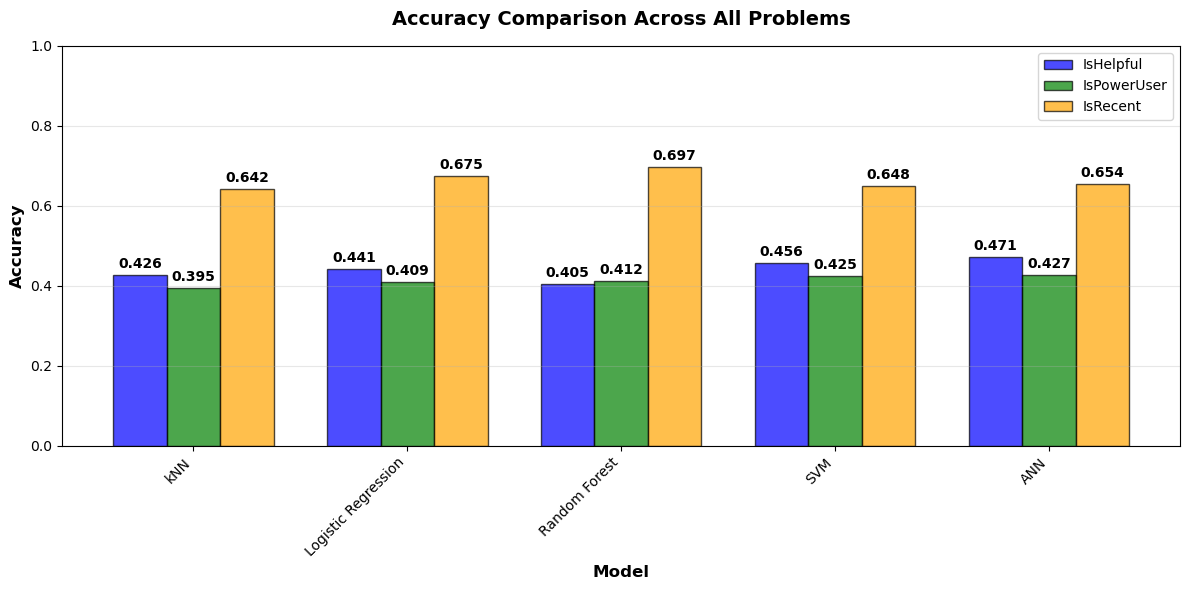

In [194]:
# Bar plot for all models

plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.25

bars1 = plt.bar(x - width, results_df['IsHelpful Accuracy'], width, 
                label='IsHelpful', color='blue', alpha=0.7, edgecolor='black')
bars2 = plt.bar(x, results_df['IsPowerUser Accuracy'], width, 
                label='IsPowerUser', color='green', alpha=0.7, edgecolor='black')
bars3 = plt.bar(x + width, results_df['IsRecent Accuracy'], width, 
                label='IsRecent', color='orange', alpha=0.7, edgecolor='black')

plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Accuracy Comparison Across All Problems', fontweight='bold', fontsize=14, pad=15)
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')

# Adding bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

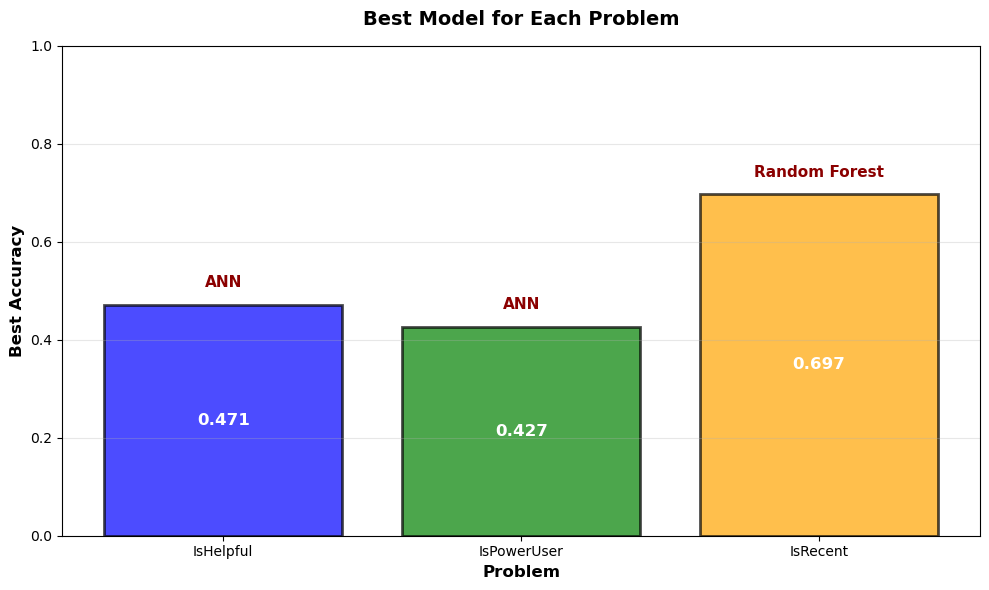

In [195]:
#Best model za every ML Cases 

plt.figure(figsize=(10, 6))

best_for_each = {
    'IsHelpful': results_df.loc[results_df['IsHelpful Accuracy'].idxmax(), 'Model'],
    'IsPowerUser': results_df.loc[results_df['IsPowerUser Accuracy'].idxmax(), 'Model'],
    'IsRecent': results_df.loc[results_df['IsRecent Accuracy'].idxmax(), 'Model']
}

best_accuracies = [
    results_df[results_df['Model'] == best_for_each['IsHelpful']]['IsHelpful Accuracy'].values[0],
    results_df[results_df['Model'] == best_for_each['IsPowerUser']]['IsPowerUser Accuracy'].values[0],
    results_df[results_df['Model'] == best_for_each['IsRecent']]['IsRecent Accuracy'].values[0]
]

bars_best = plt.bar(best_for_each.keys(), best_accuracies,
                   color=['blue', 'green', 'orange'], alpha=0.7, edgecolor='black', linewidth=2)

plt.xlabel('Problem', fontweight='bold', fontsize=12)
plt.ylabel('Best Accuracy', fontweight='bold', fontsize=12)
plt.title('Best Model for Each Problem', fontweight='bold', fontsize=14, pad=15)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')

# Adding name of model and values
for bar, model_name, acc in zip(bars_best, best_for_each.values(), best_accuracies):
    height = bar.get_height()
    # Model name
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.03,
            model_name, ha='center', va='bottom', 
            fontweight='bold', fontsize=11, color='darkred')
    # Accuracy in the middle 
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{acc:.3f}', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

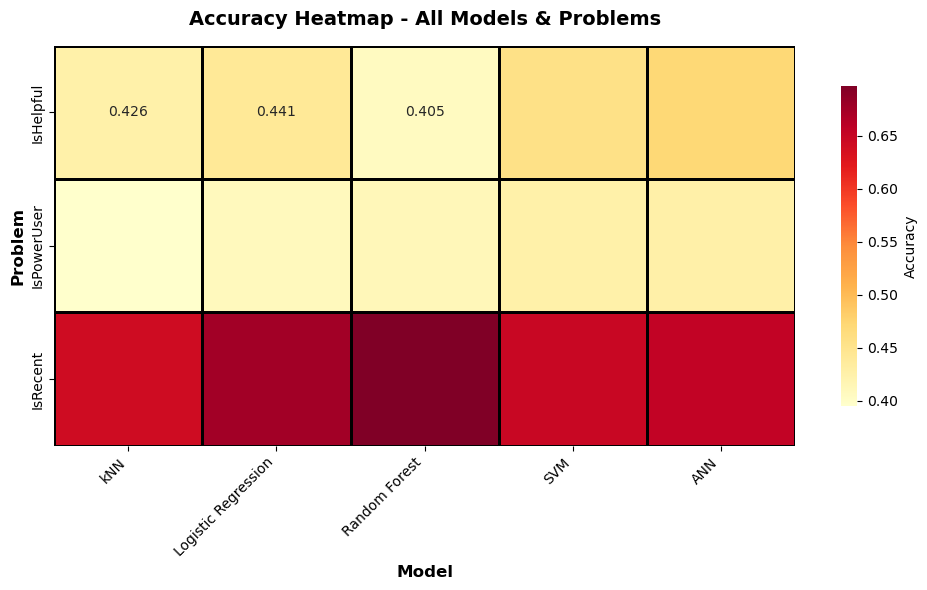

In [196]:
#Heatmap


plt.figure(figsize=(10, 6))

heatmap_data = results_df[['IsHelpful Accuracy', 'IsPowerUser Accuracy', 'IsRecent Accuracy']].values.T

sns.heatmap(heatmap_data, 
            xticklabels=results_df['Model'], 
            yticklabels=['IsHelpful', 'IsPowerUser', 'IsRecent'],
            annot=True, fmt='.3f', cmap='YlOrRd',
            linewidths=1, linecolor='black',
            cbar_kws={'label': 'Accuracy', 'shrink': 0.8})

plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Problem', fontweight='bold', fontsize=12)
plt.title('Accuracy Heatmap - All Models & Problems', fontweight='bold', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


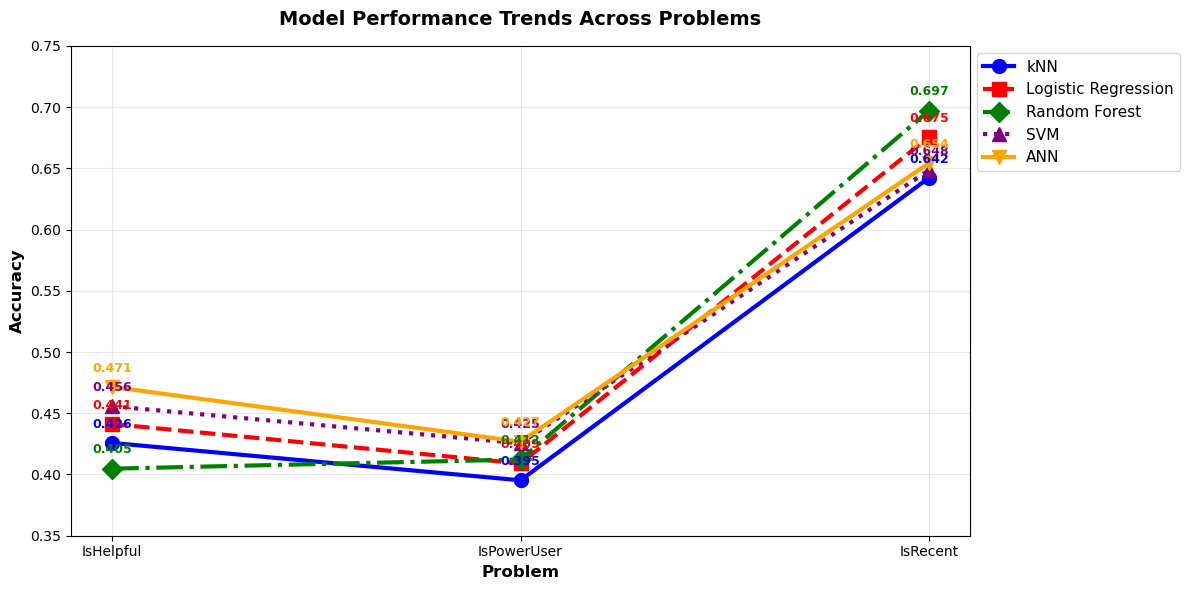

In [197]:
# Line plot trends

plt.figure(figsize=(12, 6))

markers = ['o', 's', 'D', '^', 'v']
colors = ['blue', 'red', 'green', 'purple', 'orange']
line_styles = ['-', '--', '-.', ':', '-']

for i, model in enumerate(results_df['Model']):
    plt.plot(['IsHelpful', 'IsPowerUser', 'IsRecent'], 
             results_df.iloc[i, 1:].values, 
             marker=markers[i], label=model, linewidth=3,
             color=colors[i], markersize=10, linestyle=line_styles[i])

plt.xlabel('Problem', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Model Performance Trends Across Problems', fontweight='bold', fontsize=14, pad=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)
plt.ylim(0.35, 0.75)  
plt.grid(True, alpha=0.3)

# Adding values
for i, model in enumerate(results_df['Model']):
    for j, problem in enumerate(['IsHelpful', 'IsPowerUser', 'IsRecent']):
        value = results_df.iloc[i, j+1]
        plt.text(j, value + 0.01, f'{value:.3f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold',
                color=colors[i])

plt.tight_layout()
plt.show()